Lab 10
---
Hello and welcome to DSCI 510's lab 10.

Guidelines for the Lab:

- Please write and submit the two programs below by the deadline: Monday, April 10, at 6:00pm Pacific time

- You must complete the assignments individually. If you have trouble completing the assignment, please let one of the teaching assistants (TAs) know, during the lab or their office hours. They will help and guide you, but they will not write code for you and no one else should :) !!!  

- You have to fill in the code in this notebook and upload it back to Blackboard for submission. Please remember to rename your file as "Lab10_[YOUR FIRSTNAME]_[YOUR LASTNAME].ipynb" (e.g. Lab10_George_Washington.ipynb).

- You may look up resources online like python docs and stackoverflow. You may look up topics, but not the questions themselves.

- You can submit only one time. Your grade will be based on this submission.

Q1: SQL - Build Two Oil Price Tables [15 points] 
---
You are to build a SQL database with two tables, from two oil price files, `brent-daily.csv` and `wti-daily.csv`.

Complete the `feed_data` function which will feed all data from `filename` (argument) into a sqlite database. While doing this, make sure of the following: 
- The SQL tables should not include the first row of the csv files (it has the name of the columns in it.)
- Database name: lab10.db
- Database table names: `brent_oil_price` and `wti_oil_price`
- Columns in each table: date (type: DATE) and price (type: REAL)

For this function, you don't have to print/return anything. Do not change given code.   

Note 1: To read in the csv files, you may use the `csv` or `pandas` libraries.<br>
Note 2: Date column in the csv files will have "YYYY-MM-DD" format.<br>
Note 3: Use the datetime module for date manipulation. References: Lecture on March 22, datetime.ipynb; https://docs.python.org/3/library/datetime.html Specifically: https://docs.python.org/3/library/datetime.html#datetime.datetime.strptime<br>
Note 4: Once you use strptime, you will get datetime. But, you need to insert date. (See `date()` function in datetime)<br>
Note 5: In the print output, if you see a string instead of datetime.date(...), then you do not have the data stored in the correct format.  

In [61]:
import datetime
import sqlite3
import csv

def feed_data(filename, table_name):
    conn = sqlite3.connect('lab10.db', detect_types=sqlite3.PARSE_DECLTYPES|sqlite3.PARSE_COLNAMES)
    cur = conn.cursor()
        
    # open the file and creat a list of tuple
    data = []
    with open(filename, 'r') as df1:
        content = csv.reader(df1, delimiter = ',')
        # skip the header
        next(content)
        for row in content:
            row[0] = datetime.datetime.strptime(row[0],"%Y-%m-%d").date()
            row[1] = float(row[1])
            data.append((row[0],row[1]))
        
    # check whether the tables exist
    cur.execute(f"DROP TABLE IF EXISTS {table_name}")
    
    # Create table and insert data
    cur.execute(f"""CREATE TABLE {table_name}
    (date DATE, 
    price REAL)""")
    
    # insert data
    cur.executemany(f"INSERT INTO {table_name} VALUES (?, ?)", data)
    
    cur.execute('SELECT * FROM ' + table_name + ' LIMIT 1')
    return_val = cur.fetchall()
    print(return_val)

    conn.commit()
    conn.close()
    
feed_data('brent-daily.csv', 'brent_oil_price')
feed_data('wti-daily.csv', 'wti_oil_price')

[(datetime.date(1987, 5, 20), 18.63)]
[(datetime.date(1986, 1, 2), 25.56)]


Q2: SQL queries [15 points, 3 per query] 
---
For this question, you have to write queries on the `lab10.db` for the following questions and print the results of the query.
1. Get Brent oil prices for March 2023. Print format: [(date, price)]   
2. Number of days for which there exists prices for both (Brent and WTI) oil. Print format: int 
3. Get Brent oil prices for dates when Brent oil price is higher than WTI oil prices. Print format: [(date, price)]
4. Find number of days where Brent oil price is at least 105 and at most 115. Print format: int
5. Get information of Brent and WTI oil price in January-March 2023 which is sorted by difference between Brent and WTI oil price. Print format: [(date, brent oil price, wti oil price)]

In [62]:
# Lab10.Q2.1 Brent March 2023


conn = sqlite3.connect('lab10.db', detect_types=sqlite3.PARSE_DECLTYPES|sqlite3.PARSE_COLNAMES)
cur = conn.cursor()

cur.execute("SELECT * FROM brent_oil_price where date BETWEEN '2023-03-01' AND '2023-03-31'")

results_Q1 = cur.fetchall()
print('Output for Query 1:')
print(results_Q1)

conn.commit()
conn.close()    

Output for Query 1:
[(datetime.date(2023, 3, 1), 84.31), (datetime.date(2023, 3, 2), 84.75), (datetime.date(2023, 3, 3), 85.83), (datetime.date(2023, 3, 6), 86.18), (datetime.date(2023, 3, 7), 83.29), (datetime.date(2023, 3, 8), 82.66), (datetime.date(2023, 3, 9), 81.59), (datetime.date(2023, 3, 10), 82.78), (datetime.date(2023, 3, 13), 80.77), (datetime.date(2023, 3, 14), 77.45), (datetime.date(2023, 3, 15), 73.69), (datetime.date(2023, 3, 16), 74.7), (datetime.date(2023, 3, 17), 72.97), (datetime.date(2023, 3, 20), 73.79), (datetime.date(2023, 3, 21), 75.32), (datetime.date(2023, 3, 22), 76.69), (datetime.date(2023, 3, 23), 75.91), (datetime.date(2023, 3, 24), 74.99), (datetime.date(2023, 3, 27), 78.12), (datetime.date(2023, 3, 28), 78.65), (datetime.date(2023, 3, 29), 78.28), (datetime.date(2023, 3, 30), 79.27)]


In [63]:
# Lab10.Q2.2 Number of days with parallel Brent-WTI data

conn = sqlite3.connect('lab10.db', detect_types=sqlite3.PARSE_DECLTYPES|sqlite3.PARSE_COLNAMES)
cur = conn.cursor()

cur.execute("SELECT COUNT(*) FROM brent_oil_price JOIN wti_oil_price ON brent_oil_price.date = wti_oil_price.date")
results_Q2 = cur.fetchall()
print('Output for Query 2:')
print(int(results_Q2[0][0]))

conn.commit()
conn.close()   

Output for Query 2:
8968


In [64]:
# Lab10.Q2.3 Percentage days with Brent > WTI

conn = sqlite3.connect('lab10.db', detect_types=sqlite3.PARSE_DECLTYPES|sqlite3.PARSE_COLNAMES)
cur = conn.cursor()

cur.execute("SELECT brent_oil_price.date, brent_oil_price.price FROM brent_oil_price JOIN wti_oil_price ON brent_oil_price.date = wti_oil_price.date WHERE brent_oil_price.price > wti_oil_price.price")
results_Q3 = cur.fetchall()
print('Output for Query 3:')
print(results_Q3)


conn.commit()
conn.close()

Output for Query 3:
[(datetime.date(1987, 12, 18), 15.6), (datetime.date(1987, 12, 21), 15.4), (datetime.date(1987, 12, 22), 16.7), (datetime.date(1987, 12, 23), 17.25), (datetime.date(1987, 12, 24), 17.1), (datetime.date(1987, 12, 28), 17.0), (datetime.date(1987, 12, 29), 17.38), (datetime.date(1987, 12, 30), 17.85), (datetime.date(1987, 12, 31), 17.6), (datetime.date(1988, 1, 4), 17.95), (datetime.date(1988, 1, 6), 17.9), (datetime.date(1988, 1, 11), 16.65), (datetime.date(1988, 7, 11), 14.63), (datetime.date(1989, 1, 26), 17.73), (datetime.date(1989, 3, 31), 20.45), (datetime.date(1989, 4, 24), 21.2), (datetime.date(1990, 1, 5), 23.13), (datetime.date(1990, 8, 3), 24.13), (datetime.date(1990, 8, 9), 25.9), (datetime.date(1990, 8, 14), 27.1), (datetime.date(1990, 8, 20), 28.9), (datetime.date(1990, 8, 21), 29.05), (datetime.date(1990, 8, 23), 32.35), (datetime.date(1990, 8, 24), 31.65), (datetime.date(1990, 8, 27), 27.65), (datetime.date(1990, 8, 29), 27.65), (datetime.date(1990, 8, 

In [65]:
# Lab10.Q2.4 Number of days with Brent in [105 .. 115]

conn = sqlite3.connect('lab10.db', detect_types=sqlite3.PARSE_DECLTYPES|sqlite3.PARSE_COLNAMES)
cur = conn.cursor()

cur.execute("SELECT COUNT(*) FROM brent_oil_price WHERE price BETWEEN 105 AND 115")
results_Q4 = cur.fetchall()
print('Output for Query 4:')
print(int(results_Q4[0][0]))

conn.commit()
conn.close()

Output for Query 4:
670


In [66]:
# Lab10.Q2.5 Sorted by Brent - WTI

conn = sqlite3.connect('lab10.db', detect_types=sqlite3.PARSE_DECLTYPES|sqlite3.PARSE_COLNAMES)
cur = conn.cursor()

cur.execute("""SELECT brent_oil_price.date,  brent_oil_price.price, wti_oil_price.price
FROM brent_oil_price JOIN wti_oil_price 
ON brent_oil_price.date = wti_oil_price.date
WHERE brent_oil_price.date BETWEEN '2023-01-01' AND '2023-03-31'
ORDER BY brent_oil_price.price - wti_oil_price.price
""")

results_Q5 = cur.fetchall()
print('Output for Query 5:')
print(results_Q5)

conn.commit()
conn.close()

Output for Query 5:
[(datetime.date(2023, 1, 6), 78.57, 73.77), (datetime.date(2023, 3, 30), 79.27, 74.37), (datetime.date(2023, 1, 10), 80.1, 75.12), (datetime.date(2023, 1, 4), 77.84, 72.84), (datetime.date(2023, 1, 5), 78.69, 73.67), (datetime.date(2023, 1, 9), 79.65, 74.63), (datetime.date(2023, 1, 3), 82.1, 76.93), (datetime.date(2023, 1, 11), 82.67, 77.41), (datetime.date(2023, 3, 27), 78.12, 72.81), (datetime.date(2023, 3, 29), 78.28, 72.97), (datetime.date(2023, 1, 16), 84.24, 78.85), (datetime.date(2023, 1, 13), 85.28, 79.86), (datetime.date(2023, 3, 28), 78.65, 73.2), (datetime.date(2023, 1, 18), 84.98, 79.48), (datetime.date(2023, 1, 31), 84.49, 78.87), (datetime.date(2023, 1, 12), 84.03, 78.39), (datetime.date(2023, 3, 7), 83.29, 77.58), (datetime.date(2023, 3, 6), 86.18, 80.46), (datetime.date(2023, 3, 24), 74.99, 69.26), (datetime.date(2023, 1, 17), 85.92, 80.18), (datetime.date(2023, 3, 22), 76.69, 70.9), (datetime.date(2023, 1, 19), 86.16, 80.33), (datetime.date(2023, 3

# Bonus Question: Basic Pandas [10 points]
---
All tasks and questions below refer to the market period from January 1, 2023 to March 31, 2023 (inclusive).<br>
  1. **Download** the stock market prices for Boeing (BA), Caterpillar (CAT), Honeywell (HON) and Salesforce (CRM).
  2. **Build** a joint Pandas data frame of closing prices for the four companies.
  3. **Plot** the closing prices of the four companies.
  4. Which two of the four companies' stock market closing prices are the **most** closely correlated?
  5. Which two of the four companies' stock market closing prices are the **least** closely correlated (most independent)?
  6. What is the **maximum** closing price of Caterpillar?<br>
  7. What is the **average** (mean) closing price of Boeing?
  8. What is the **median** (50% percentile) closing price of Boeing?

**Reference:** DSCI 510 lecture on April 5, 2023<br>
**Hint:** Suggested API structure is yf.download(tickers='...',  start='...', end='...', interval='...') where dates are in standard *YYYY-MM-DD* format.

In [75]:
import pandas as pd
import yfinance as yf

In [79]:
# 1. download stock market prices for 4 companies
ba = yf.download(tickers='BA', start = '2023-01-01', end = '2023-03-31', interval = '1d')  # Boeing
cat = yf.download(tickers='CAT', start = '2023-01-01', end = '2023-03-31', interval = '1d') # Caterpillar
hon = yf.download(tickers='HON', start = '2023-01-01', end = '2023-03-31', interval = '1d') # Honeywell
crm = yf.download(tickers='CRM', start = '2023-01-01', end = '2023-03-31', interval = '1d') # Salesforce

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [80]:
# 2. buil a joint dataframe of closing prices
df = pd.DataFrame({'Boeing': ba['Close'], 'Caterpillar': cat['Close'], 'Honeywell': hon['Close'], 'Salesforce': crm['Close']})

<Axes: xlabel='Date'>

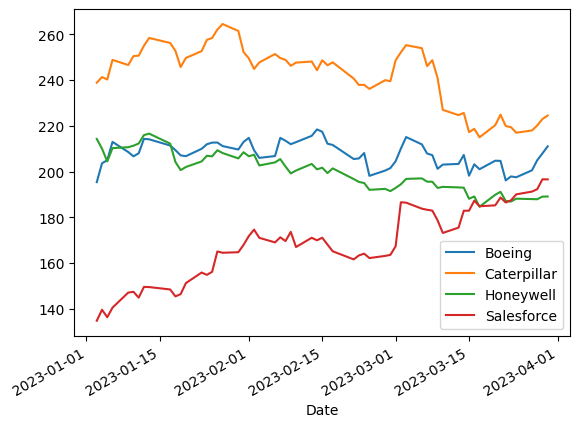

In [81]:
# 3. plot the closing price
df.plot()

In [83]:
# 4-5. Correlation analysis
df.corr()

,Boeing,Caterpillar,Honeywell,Salesforce
Boeing,1.000000,0.682278,0.540252,-0.158138
Caterpillar,0.682278,1.000000,0.789323,-0.570117
Honeywell,0.540252,0.789323,1.000000,-0.787075
Salesforce,-0.158138,-0.570117,-0.787075,1.000000


In [84]:
# 6. maximum of Caterpillar
df['Caterpillar'].max()

264.5400085449219

In [85]:
# 7. average of Boeing
df['Boeing'].mean()

207.6955741507108

In [86]:
# 8. median of Boeing
df['Boeing'].median()

207.97000122070312

Answers to bonus questions 4-8:<br>
  4. Honeywell and Caterpillar are most closely correlated.<br>
  5. Salesforce and Boeing are least closely correlated (most independent).<br>
  6. The maximum closing price of Caterpillar is 264.5400085449219<br>
  7. The average closing price of Boeing 207.6955741507108<br>
  8. The median closing price of Boeing 207.97000122070312